####        

## STAT 504 Analytics
### Mohammad Ashrafuzzaman
## Homework 3 for Dataset 1 - Recidivism

In [71]:
import matplotlib
%matplotlib nbagg
import matplotlib.pyplot as plt
from ggplot import *

from pprint import pprint
import pyparser
import pyparsing
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import pydot
import pylab as pl
import scipy.sparse as sp
import urllib
import math
import time
import json
from pandas.io.json import json_normalize

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.externals.six import StringIO  
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import KFold
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, SelectFpr, chi2
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from IPython.display import Image



## DATASET 1 - FELONY RECIDIVISM DATA

Filename: "STRONG-R Male Sample_Reduced_2014-03-14.csv"
The variables are described in file "STRONG Codebook.xls". 
The response variable is FelRecidYr3 (1 versus 0) - Felony recidivism (repeat offence) in 3 years.

## Data Loading and Massaging

In [15]:
#TODO - uncomment urllib.urlretrieve('http://webpages.uidaho.edu/~stevel/504/STRONG-R Male Sample_Reduced_2014-03-14.csv', 'strong.csv')
crimdata = pd.read_csv('strong.csv')
crimdata['FelRecidYr3'].replace('', np.nan, inplace=True)
crimdata = crimdata.sample(n=5000)
filter = crimdata["FelRecidYr3"] != " "
crimdata = crimdata[filter]
crimdata1 = crimdata
y=crimdata1.FelRecidYr3.astype(int)
del crimdata['FelRecidYr3']
del crimdata['Unnamed: 338']
del crimdata['Unnamed: 339']
del crimdata['Unnamed: 340']
print crimdata.shape
X = crimdata
rownum = crimdata.shape[0]
print rownum

(2674, 337)
2674


<IPython.core.display.Javascript object>


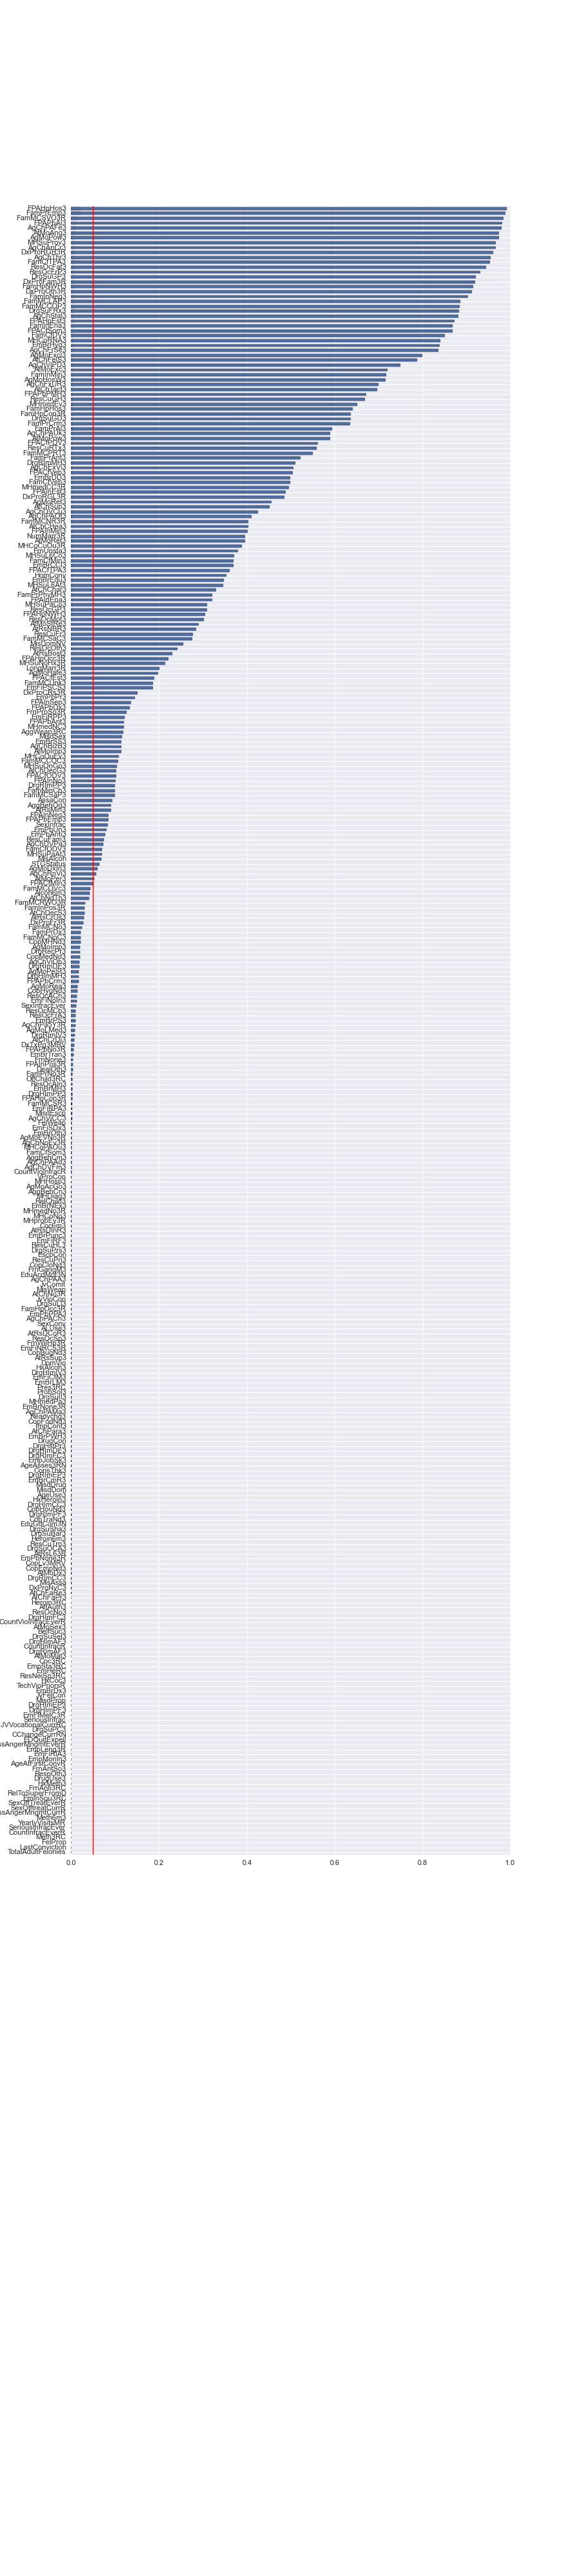

SexInfrac             0.000003
MHSuProv3             0.000015
AgChBizB3             0.000025
AgChAnCr3             0.000046
HomConv               0.000060
FamCfDV3              0.000086
FPAHpHos3             0.000125
AgMoHate3             0.000128
AtRsBost3             0.000134
DrgSuFRx3             0.000146
FamMCCOP3             0.000159
MHCoRNA3              0.000171
MHSuL6At3             0.000180
FPACfTPA3             0.000201
EmBrCCI3              0.000204
FPACfPDV3             0.000239
STGStatus             0.000241
AgChFrSe3             0.000246
DrgSuPrs3             0.000273
FamHpHos3             0.000278
FamCfTPA3             0.000310
ResCuRTx3             0.000342
AgChFxUR3             0.000348
EmBrEdu3              0.000358
FamMCOVc3             0.000367
EmFiRPP3              0.000371
FamPrEmp3             0.000374
MHSuL6Co3             0.000384
DrgSuGP3              0.000414
FamCfODV3             0.000415
                        ...   
Readychg3             0.006300
ProbSol3

In [5]:
rforest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rforest.fit(X, y)
import matplotlib
%matplotlib nbagg
feature_importances = pd.Series(rforest.feature_importances_, index=X.columns)
feature_importances.sort(ascending=True)
feature_importances.plot(kind="barh", figsize=(11,50))
feature_importances[:]

## Selecting Feature Variables

In [7]:
topfeatures = SelectKBest(chi2, k=all)
topfeatures = SelectFpr(chi2, alpha=0.05)

x_indices = np.arange(X.shape[-1])

selector = SelectFpr(f_classif, alpha=0.05)
selector.fit(X, y)

topindex = pd.Series(selector.pvalues_, index=X.columns)
topindex.sort()
topindex.plot(kind="barh", figsize=(11,40));
plt.axvline(x=0.05, ymin=0, ymax = 5, linewidth=1, color='red')


In [8]:

b = selector.pvalues_ < .05
b = pd.DataFrame(b)
b.rename(columns={0: 'sig'}, inplace=True)

Xcol = pd.DataFrame(X.columns)
bresult = pd.concat([b, Xcol], axis=1)
bresult.rename(columns={0: 'name'}, inplace=True)
bresult2 = bresult.loc[bresult['sig'] == True]
bresult2


,sig,name
0,True,AgeAsses3RN
1,True,AgeAtFirstConvR
2,True,JvFelCon
3,True,JvVioCon
4,True,JvComit
6,True,SexConv
7,True,VProCon
9,True,DomVio
10,True,FelWeap
11,True,FelProp


In [9]:
bresult3 = bresult2["name"].tolist()
bresult3


['AgeAsses3RN',
 'AgeAtFirstConvR',
 'JvFelCon',
 'JvVioCon',
 'JvComit',
 'SexConv',
 'VProCon',
 'DomVio',
 'FelWeap',
 'FelProp',
 'DrugCon',
 'EscpCon',
 'MisAssa',
 'MisdDom',
 'MisWeap',
 'MisdProp',
 'MisdDrug',
 'MisdEscp',
 'TotalAdultFelonies',
 'LastConviction',
 'TechVioPriorsR',
 'CountInfracR',
 'CountVioInfracR',
 'CountInfracEverR',
 'CountVioInfracEverR',
 'SeriousInfrac',
 'SeriousInfracEver',
 'SexInfracEver',
 'YearlyVisitsMR',
 'RelToSuperFromD',
 'CChangeCurrRN',
 'IJVVocationalCurrRC',
 'StressAngerMngmtEverR',
 'StressAngerMngmtCurrR',
 'SexOffTreatEverR',
 'SexOfftreatCurrR',
 'EduGdCom3N',
 'EDQuitExpell',
 'EduAcdMot3N',
 'EmpLeng3R',
 'EmpJobSk3',
 'EmInSou3RC',
 'EmpMonIn3',
 'EmHeRC',
 'EmpSta3RC',
 'EmPbNone3R',
 'EmPbPPA3',
 'EmBrNone3R',
 'EmBrPS3',
 'EmBrNEx3',
 'EmBrPWH3',
 'EmBrLM3',
 'EmBrTran3',
 'EmBrMH3',
 'EmBrCmR3',
 'EmBrDx3',
 'EmBrPunc3',
 'EmBrOth3',
 'EmFiNoIn3',
 'EmFiMetC3R',
 'EmFiRPA3',
 'EmFiRF3',
 'EmFiCtM3',
 'EmFiNRCS3R',
 'EmFiRIA

In [10]:
X = crimdata1[bresult3]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
y_test.value_counts()
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
print scores

mse_scores = -scores
print mse_scores

rmse_scores = np.sqrt(mse_scores)
print rmse_scores

# calculate the average RMSE
print rmse_scores.mean()


[-0.18854907 -0.19670652 -0.17002551 -0.19126951 -0.18282369 -0.20590989
 -0.17562105 -0.16242933 -0.20446438 -0.22542742]
[ 0.18854907  0.19670652  0.17002551  0.19126951  0.18282369  0.20590989
  0.17562105  0.16242933  0.20446438  0.22542742]
[ 0.43422237  0.44351608  0.4123415   0.4373437   0.42757887  0.45377295
  0.41907166  0.40302522  0.45217737  0.47479198]
0.435784171043


# MODEL EVALUATIONS

## 1. Null Model 

The Models used are evaluated against the Null Model, which assumes that everyone will recommit a felony within three years.


In [16]:
ypred = np.ones(rownum)
resultnull = metrics.roc_auc_score(y, ypred)
print "The AUC for the Null Model: " + str(round(resultnull, 4))

The AUC for the Null Model: 0.5


In [17]:
start = time.time()

time_1_null = %%timeit -o 1 + 2
# calc the null accuracy
y_test.value_counts().head(1) / len(y_test)

end = time.time()
time_1_null = end - start
print time_1_null

10000000 loops, best of 3: 19.4 ns per loop
0.833276987076


In [18]:
nullmodel = DummyClassifier(strategy='most_frequent', random_state=99, constant=None)
nullmodel.fit(X,y)
DummyClassifier(constant=None, random_state=99, strategy='most_frequent')
y_pred_prob = nullmodel.predict_proba(X_test)[:, 1]
print metrics.roc_auc_score(y_test, y_pred_prob)


0.5


<IPython.core.display.Javascript object>


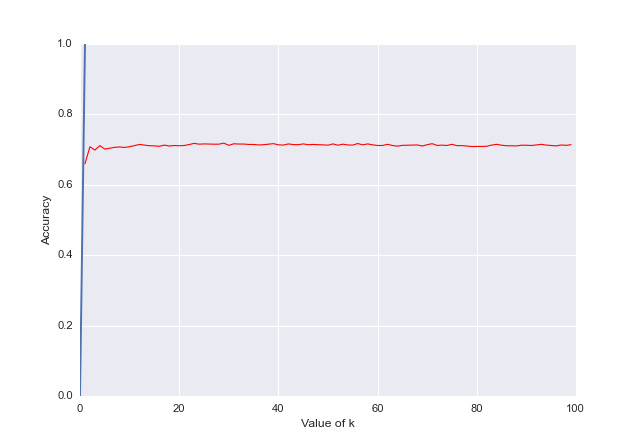

In [19]:
import matplotlib
%matplotlib nbagg
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

In [20]:
nullmodel_mean1 = cross_val_score(nullmodel, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()


In [21]:
nullmodel_scores1 = cross_val_score(nullmodel, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')


### 2. Logistic Regression Model

In [22]:
lreg = LogisticRegression(random_state = 22, C=1e9)
start4 = time.time()
lreg.fit(X,y)
lreg_scores = cross_val_score(lreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
lreg_auc_scores = cross_val_score(lreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')
#result4 = cross_val_score(lreg, X, y, cv = kf, scoring = 'roc_auc').mean()
end4 = time.time()
time4 = end4 - start4
print "The AUC for the variables selected with logistic regression is:"
print lreg_scores
print "The time it took to run is:"
print round(time4, 2)
start5 = time.time()
end5 = time.time()
time5 = end5 - start5
print "The AUC for the variables selected with K best is:"
print lreg_auc_scores
print "The time it took to run is:"
print round(time5, 2)

The AUC for the variables selected with logistic regression is:
[ 0.71641791  0.70522388  0.69029851  0.69029851  0.66666667  0.67041199
  0.6741573   0.70037453  0.66666667  0.71161049]
The time it took to run is:
8.92
The AUC for the variables selected with K best is:
[ 0.61584007  0.64448063  0.72390572  0.66819409  0.70623485  0.72266922
  0.64094822  0.67083016  0.67444444  0.6320435 ]
The time it took to run is:
0.0


In [23]:
mean_score = lreg_scores.mean()
std_dev = lreg_scores.std()
std_error = lreg_scores.std() / math.sqrt(lreg_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.689213 +/-  0.012839
95 percent probability that if this experiment were repeated over and over the average score would be between 0.676373 and 0.702052


### 3. K Nearest-Neighbor Model

In [24]:
# Find an optimal value of K for KNN
k_range = range(1, 100)
k_scores = []
start = time.time()
for k in k_range:
    knnopt = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knnopt, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores
end = time.time()
print "Time: " + str(end - start)


[0.65967633741405352, 0.70794203141595402, 0.69859271060428207, 0.71126530269998312, 0.70154704008049629, 0.70383895131086149, 0.70643551903404334, 0.70756470456705234, 0.70606098719883736, 0.70828162557996532, 0.71129325283693889, 0.71464307675107608, 0.71278439264352389, 0.71093129856336312, 0.71055397171446144, 0.70941640114036564, 0.712784392643524, 0.71017943987925536, 0.71166219464475367, 0.71090474593325503, 0.7116426295488848, 0.71429929006652126, 0.71764352395326725, 0.7154270780926828, 0.71615517916037796, 0.71576667225669399, 0.715411705517357, 0.71540192296942262, 0.71838420258259261, 0.71206747163061102, 0.71651992844764945, 0.71577924981832408, 0.71578623735256297, 0.71463748672368488, 0.71465425680585837, 0.71317709206775115, 0.71391078316283751, 0.71539074291464033, 0.7169154228855722, 0.71353205880708814, 0.71280116272569738, 0.71614819162613896, 0.71430907261445575, 0.71392196321761969, 0.71618033428363792, 0.71389960310805523, 0.71465285929901046, 0.71391078316283751

<IPython.core.display.Javascript object>


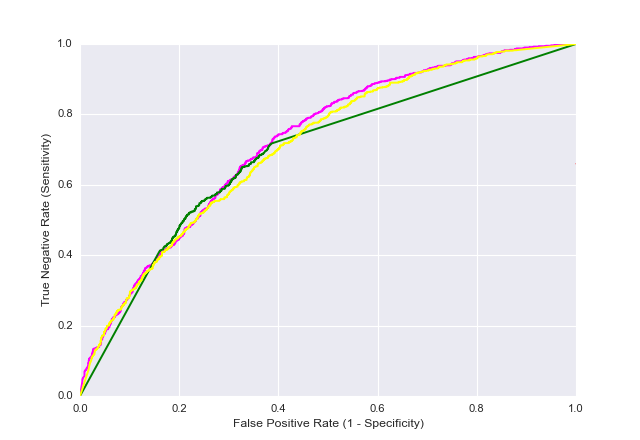

In [26]:
import matplotlib
%matplotlib nbagg
plt.plot(k_range, k_scores, color = 'red', linewidth = 1)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')


Looks like the optimal value of k is 97.

#### K Nearest-Neighbor Model with k=97

In [27]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=97)
knn_scores = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
end = time.time()
time_1_knn = end - start
print "Time for kNN with k=97: " + str(time_1_knn)
print knn_scores

Time for kNN with k=97: 3.83140587807
[ 0.72014925  0.72761194  0.73507463  0.67164179  0.72284644  0.72659176
  0.71161049  0.68164794  0.70037453  0.71910112]


In [28]:
mean_score = knn_scores.mean()
std_dev = knn_scores.std()
std_error = knn_scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)


Score is 0.711665 +/-  0.014140
95 percent probability that if this experiment were repeated over and over the average score would be between 0.697525 and 0.725805


### 4. Naive-Bayes - Multinomial Model

In [29]:
start = time.time()
nbm = MultinomialNB()
nbm.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nbm_scores = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
time_1_nbm = end - start
print "Time for Multinomial Naive Bayes: " + str(time_1_nbm)
nbm_scores_mean = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbm_scores_mean
nbm_scores_auc = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbm_scores_mean
nbm_scores_auc = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbm_scores_auc

mean_score = nbm_scores.mean()
std_dev = nbm_scores.std()
std_error = nbm_scores.std() / math.sqrt(nbm_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Multinomial NB Score is %f +/-  %f" % (mean_score, ci)
print "Multinomial NB AUC is "
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)


Time for Multinomial Naive Bayes: 0.120089054108
0.68060400246
0.68060400246
0.701488958258
Multinomial NB Score is 0.680263 +/-  0.017466
Multinomial NB AUC is 
95 percent probability that if this experiment were repeated over and over the average score would be between 0.662797 and 0.697729


### 5. Naive-Bayes - Gaussian Model

In [30]:
start = time.time()
nbg = GaussianNB()
nbg.fit(X, y)
GaussianNB()
nbg_scores = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print nbg_scores
end = time.time()
time_1_nbg = end - start
print time_1_nbg
nbg_scores_mean1 = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbg_scores_mean1
nbg_scores_auc1 = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbg_scores_auc1

[ 0.67910448  0.72014925  0.59701493  0.6641791   0.63670412  0.68164794
  0.64419476  0.61797753  0.68913858  0.69662921]
0.204899072647
0.663782212533
0.658721688923


### 6. Naive-Bayes - Bernoulli Model

In [31]:
start = time.time()
nbb = BernoulliNB()
nbb.fit(X, y)
BernoulliNB(alpha=1.0, class_prior=None, fit_prior=True)

nbb_scores = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print nbb_scores
end = time.time()
time_1_nbb = end - start
print time_1_nbb

nbb_scores_mean = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbb_scores_mean
nbb_scores_auc = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbb_scores_auc

[ 0.67164179  0.64925373  0.59701493  0.69402985  0.66292135  0.62172285
  0.63670412  0.65543071  0.67041199  0.66292135]
0.249814033508
0.650709933479
0.699331189517


<IPython.core.display.Javascript object>


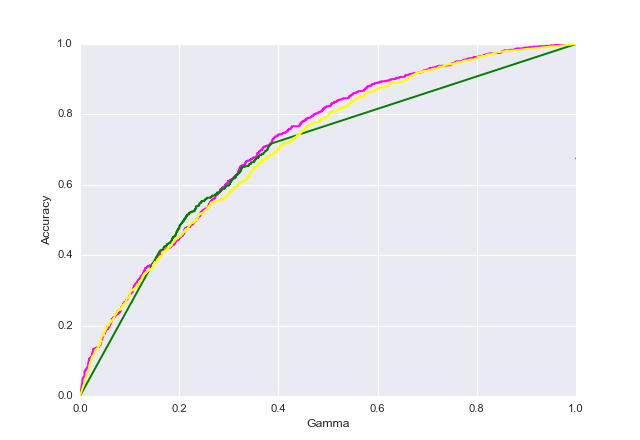

In [34]:
import matplotlib
%matplotlib nbagg
nbm_preds = nbm.predict_proba(X)[:,1]
nbm_fpr, nbm_tpr, _ = metrics.roc_curve(y, nbm_preds)

nbg_preds = nbg.predict_proba(X)[:,1]
nbg_fpr, nbg_tpr, _ = metrics.roc_curve(y, nbg_preds)

nbb_preds = nbb.predict_proba(X)[:,1]
nbb_fpr, nbb_tpr, _ = metrics.roc_curve(y, nbb_preds)

plt.plot(nbm_fpr, nbm_tpr, color='magenta')
plt.plot(nbg_fpr, nbg_tpr, color='green')
plt.plot(nbb_fpr, nbb_tpr, color='yellow')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Negative Rate (Sensitivity)')

### 7. SVM Polynomial Kernel Model

In [35]:
start = time.time()
svmpoly = svm.SVC(kernel='poly', gamma=2)
svmpoly.fit(X,y)
svmpoly_scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
end = time.time()
print svmpoly_scores
print "Time: " + str(end-start)

[ 0.6380597   0.63059701  0.68656716  0.69029851  0.68913858  0.6741573
  0.64044944  0.70037453  0.6928839   0.64419476]
Time: 25.8886060715


In [36]:
# search for an optimal gamma for SVM Polynomial Kernel Model
g_range = range(1, 10)
g_scores = []
start = time.time()
for k in g_range:
    knn = svm.SVC(kernel='poly', gamma=k)
    scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
end = time.time()
print g_scores
print "Time: " + str(end-start)

[0.67502375761641231, 0.67129241433283027, 0.66791184526804181, 0.66827799206216099, 0.66568002683213146, 0.66526776231203544, 0.66154759908323557, 0.67876348594108105, 0.66454944379227454]
Time: 206.662546158


<IPython.core.display.Javascript object>


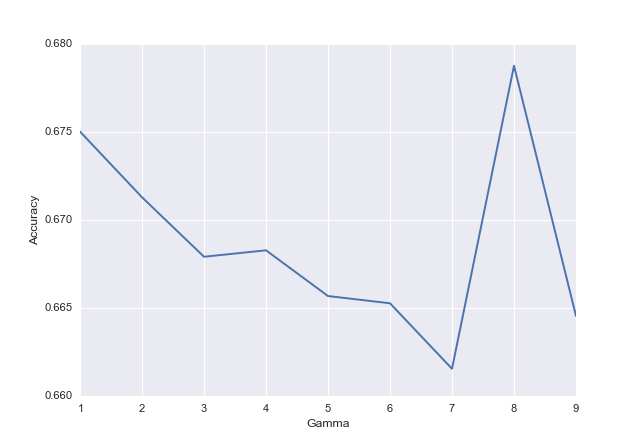

In [38]:
import matplotlib
%matplotlib nbagg
plt.plot(g_range, g_scores)
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

In [41]:
# SVM Polynomial with optimized gamma
start = time.time()
svmpoly = svm.SVC(kernel='poly', gamma=8)
svmpoly.fit(X,y)
svmpoly_acc = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
svmpoly_roc = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
time_1_svmpoly = end - start
print "SVM Polynomial with optimized gamma (=8) for accuracy: " + str(svmpoly_acc)
print "SVM Polynomial with optimized gamma (=8) for ROC AUC: " + str(svmpoly_roc)
print "Time: " + str(time_1_svmpoly)

SVM Polynomial with optimized gamma (=8) for accuracy: 0.668308737213
SVM Polynomial with optimized gamma (=8) for ROC AUC: 0.618402647501
Time: 49.1984908581


### 8. SVM Gaussian Kernel Model

In [43]:
svmg = svm.SVC(kernel='rbf', gamma=2)
svmg.fit(X,y)
svmg_scores = cross_val_score(svmg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print svmg_scores

[ 0.67537313  0.6380597   0.75        0.7238806   0.70037453  0.7340824
  0.70037453  0.71535581  0.67790262  0.72284644]


In [44]:
# search for an optimal gamma for SVM Gaussian Kernel Model
start = time.time()
g_range = range(1, 10)
g_scores = []
for k in g_range:
    svmg = svm.SVC(kernel='rbf', gamma=k)
    scores = cross_val_score(svmg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
end = time.time()
print g_scores
print "Time: " + str(end-start)

[0.70455307731007877, 0.70458382246072992, 0.70455028229638317, 0.70458801498127355, 0.70455587232377437, 0.70454329476214439, 0.70458102744703455, 0.70459360500866453, 0.70453910224160099]
Time: 213.977174997


<IPython.core.display.Javascript object>


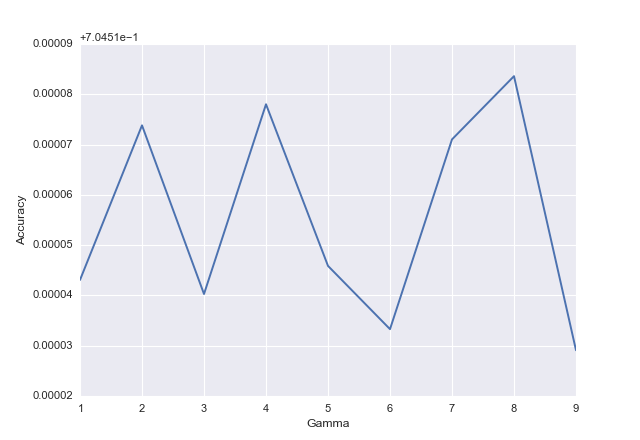

In [45]:
import matplotlib
%matplotlib nbagg

plt.plot(g_range, g_scores)
plt.xlabel('Gamma')
plt.ylabel('Accuracy')

In [46]:
start = time.time()
svmrbf = svm.SVC(kernel='rbf', gamma=8)
svmrbf.fit(X,y)
svmrbf_acc = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
svmrbf_roc = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
print "Accuracy of SVM Gaussian Model with gamma=8 : " + str(svmrbf_acc)
print "ROC AUC of SVM Gaussian Model with gamma=8 : " + str(svmrbf_roc)
print "Time for SVM Gaussian Model with gamma=8 : " + str(end - start)

Accuracy of SVM Gaussian Model with gamma=8 : 0.704595002516
ROC AUC of SVM Gaussian Model with gamma=8 : 0.504043090876
Time for SVM Gaussian Model with gamma=8 : 49.9543800354


### 9. Decision Tree Classifier Model

In [79]:
# Find optimal depth for Decision Tree Classifier Model
start = time.time()
dtc_range = range(1, 40)
dtc_scores_acc = []
dtc_scores_roc = []
for k in dtc_range:
    dtc = tree.DecisionTreeClassifier(random_state = 22, max_depth=k)
    dtc_scores_a = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
    dtc_scores_acc.append(dtc_scores_a.mean())
    dtc_scores_r = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    dtc_scores_roc.append(dtc_scores_r.mean())
end = time.time()
print "Accuracy of Decision Tree Classifier Model : " + str(dtc_scores_acc)
print "ROC AUC of Decision Tree Classifier Model : " + str(dtc_scores_auc)
print "Time: " +str(end-start)

Accuracy of Decision Tree Classifier Model : [0.70382916876292689, 0.69519816647101573, 0.6892685449158702, 0.68361143719604223, 0.6922368494605623, 0.67765805802448431, 0.67914360780367811, 0.6738847895354686, 0.6638101626697972, 0.65741377382749167, 0.66532925261333786, 0.66009139694784502, 0.67691458438146346, 0.64400469562300855, 0.65372575325619098, 0.62717032813460782, 0.63983872770976569, 0.63239001621107938, 0.64659707082564699, 0.6189418078148583, 0.63911342165576612, 0.64173793951590352, 0.63499776398904362, 0.62713259544971767, 0.63462323215383754, 0.64508496841634522, 0.64396975795181399, 0.62339985465928782, 0.63387556599027328, 0.63125104813013588, 0.63127061322600486, 0.62679020627201065, 0.62863351780423726, 0.62678601375146736, 0.63538487338587957, 0.63049499692548494, 0.62900944714629092, 0.63011347755603997, 0.61891805019844592]
ROC AUC of Decision Tree Classifier Model : 0.588525978665
Time: 65.0923259258


<IPython.core.display.Javascript object>


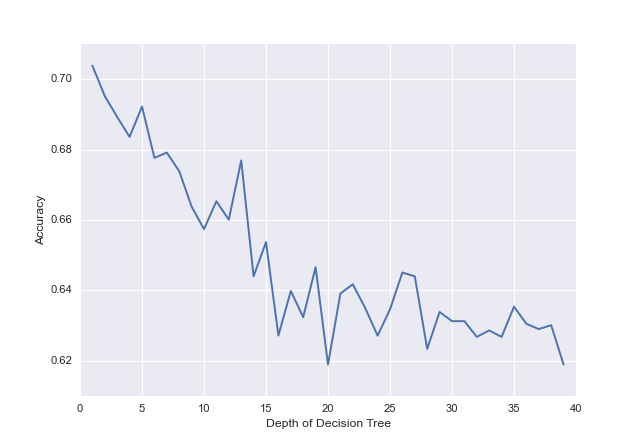

In [80]:
import matplotlib
%matplotlib nbagg
plt.plot(dtc_range, dtc_scores_acc)
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')

<IPython.core.display.Javascript object>


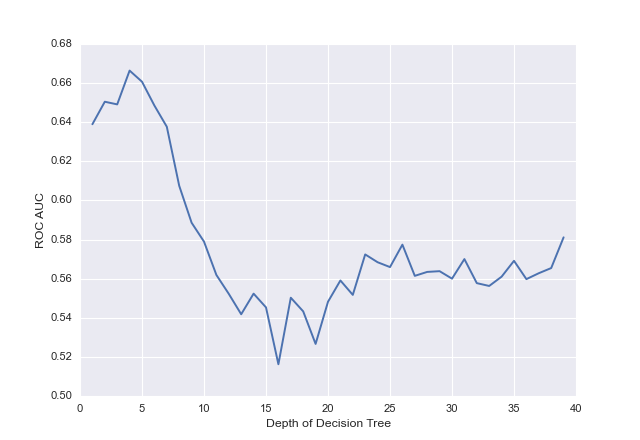

In [81]:
import matplotlib
%matplotlib nbagg
plt.plot(dtc_range, dtc_scores_roc)
plt.xlabel('Depth of Decision Tree')
plt.ylabel('ROC AUC')

#### Seems the best result happens at depth=3

In [83]:
start = time.time()
dtc = DecisionTreeClassifier(random_state = 22, max_depth=3)
dtc.fit(X,y)
dtc_scores_acc = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
dtc_scores_auc = cross_val_score(dtc, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
end = time.time()
print "Accuracy of Decision Tree Classifier Model with optimal depth (=3) : " + str(dtc_scores_acc)
print "ROC AUC of Decision Tree Classifier Model with optimal depth (=3) : " + str(dtc_scores_auc)
print "Time: " +str(end-start)

Accuracy of Decision Tree Classifier Model with optimal depth (=3) : 0.693352059925
ROC AUC of Decision Tree Classifier Model with optimal depth (=3) : 0.650711567998
Time: 0.587738990784


### 10. Bagging Classification Method

In [85]:
# Find optimal depth for Decision Tree Classifier Model
start = time.time()
bag_scores_acc = []
bag_scores_roc = []
bag_scores_mse = []
bag = BaggingClassifier(max_samples = 1000, random_state = 22)
bag_range = range(1, 100)
for k in bag_range:
    bag_cl = BaggingClassifier(bag, n_estimators=k, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=42)
    bag_cl.fit(X, y)
    bag_scores_a = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    bag_scores_m = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
    bag_scores_r = cross_val_score(bag_cl, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc') 
    bag_scores_acc.append(bag_scores_a.mean())
    bag_scores_mse.append(np.mean(np.sqrt(-bag_scores_m)))
    bag_scores_roc.append(bag_scores_r.mean())
end = time.time()
print bag_scores_acc
print bag_scores_roc
print bag_scores_mse
print "Time: " + str(end-start)

[0.70082313153334441, 0.70570182793895686, 0.70117670076583372, 0.7053175135558164, 0.7041869305159596, 0.70454189725529659, 0.70454608977583999, 0.70379702610542794, 0.70419671306389398, 0.70416596791324282, 0.70420230309128518, 0.70383755380401358, 0.70416317289954722, 0.70380960366705803, 0.70379842361227563, 0.70381659120129691, 0.70380121862597134, 0.70381379618760131, 0.70378584605064554, 0.7038277712560792, 0.70378864106434125, 0.70383895131086138, 0.70383895131086138, 0.70379702610542794, 0.703829168762927, 0.70381659120129691, 0.70380960366705791, 0.703822181228688, 0.70379283358488465, 0.70381659120129691, 0.70385152887249158, 0.70381100117390571, 0.70385152887249147, 0.7038305662697748, 0.7038137961876012, 0.7038333612834704, 0.70380401363966683, 0.70381239868075351, 0.70380261613281914, 0.70380261613281903, 0.7038165912012968, 0.70376767846162436, 0.7038165912012968, 0.70381519369444911, 0.70382916876292689, 0.70385432388618707, 0.7038137961876012, 0.70380680865336243, 0.70

<IPython.core.display.Javascript object>


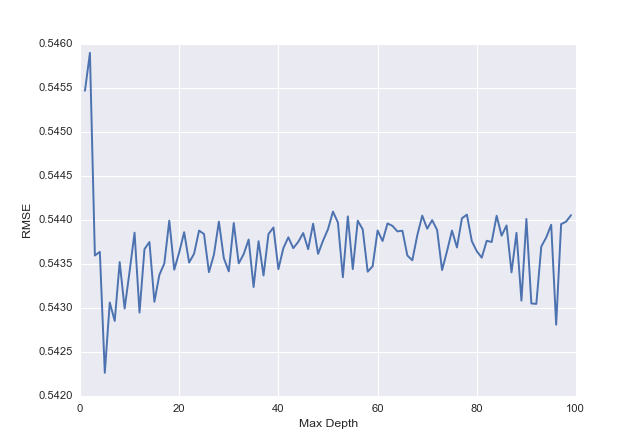

In [86]:
import matplotlib
%matplotlib nbagg
plt.plot(bag_range, bag_scores_mse)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')

### 11. Random Forest Model